<a href="https://colab.research.google.com/github/sawubona-repo/PRIVAT/blob/main/Oil-Price-Timeseries/Python_OIL_PRICE_TIMESERIES_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oil Price Time Series Analysis and Forecasting

Initial notebook to play around with data from the Weekly Oil Bulletin of the European Commission

---  
Data:
+ **Weekly Oil Bulletin** ([from European Commission](https://energy.ec.europa.eu/data-and-analysis/weekly-oil-bulletin_en))  

Other helpful data sources  
+ Brent/WTi Crude Oil Spot Prices  ([from Datahub.io](https://datahub.io/core/oil-prices#resource-brent-week))
+ EUR/USD Echange Rate ([from Yahoo Finance](https://finance.yahoo.com/quote/EURUSD%3DX/history?period1=1104537600&period2=1688601600&interval=1wk&filter=history&frequency=1wk&includeAdjustedClose=true))
---  

Author:
+ dr. daniel benninger, HSLU

History:  
+ 2023-07-05 v1 dbe --- initial version with some minor extensions/corrections   
---

## Load Libraries and Check Environment

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
print("pandas", pd.__version__)

pandas 1.5.3


In [3]:
import warnings
warnings.filterwarnings("ignore")

## Load Data and Verify Structure/Format/Values

In [4]:
# load the oil price dataset from the github repository
# data source: european commission - weekly oil bulletin
path = 'https://github.com/sawubona-repo/PRIVAT/raw/main/Oil-Price-Timeseries/eu-oil-price.csv'
data = pd.read_csv(path, delimiter=',', decimal='.')

In [5]:
data.head(10)

,Date,Super95,Diesel,Heizoel,Heizoel-II,Heizoel-III,LPG
0,2023-06-26,1724.62,1572.63,1053.04,699.13,538.56,708.63
1,2023-06-19,1725.76,1555.44,1049.65,703.58,553.15,712.28
2,2023-06-12,1729.09,1552.28,1046.34,688.93,553.54,717.69
3,2023-06-05,1715.95,1539.89,1038.93,696.23,549.51,723.13
4,2023-05-29,1719.03,1540.55,1048.49,697.58,544.09,723.61
5,2023-05-22,1705.46,1535.32,1045.63,686.37,543.19,729.15
6,2023-05-15,1703.43,1535.76,1043.86,688.42,512.07,735.16
7,2023-05-08,1709.49,1550.23,1026.45,701.33,520.41,739.10
8,2023-05-01,1732.90,1583.35,1034.12,708.54,558.59,738.61
9,2023-04-24,1744.21,1612.36,1095.41,710.80,555.80,743.69


In [11]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         916 non-null    datetime64[ns]
 1   Super95      916 non-null    float64       
 2   Diesel       916 non-null    float64       
 3   Heizoel      916 non-null    float64       
 4   Heizoel-II   916 non-null    float64       
 5   Heizoel-III  916 non-null    float64       
 6   LPG          916 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 50.2 KB


(916, 7)

In [7]:
# convert date colume to "datetime" format
data[["Date"]] = data[["Date"]].apply(pd.to_datetime)

In [8]:
data.describe()

,Super95,Diesel,Heizoel,Heizoel-II,Heizoel-III,LPG
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,1399.682806,1266.364520,805.299989,498.058319,398.807074,607.960186
std,186.122220,216.332723,211.215416,136.765623,112.970302,91.647353
min,998.210000,899.680000,479.920000,244.070000,169.950000,445.710000
25%,1267.432500,1101.107500,652.287500,384.195000,307.350000,538.197500
50%,1374.500000,1246.800000,763.270000,481.560000,381.950000,585.015000
75%,1526.072500,1383.490000,919.037500,614.730000,480.830000,682.067500
max,2035.900000,2035.240000,1728.020000,858.170000,730.960000,861.350000


In [12]:
# sort data by DATE column
data.sort_values(by='Date', inplace=True)
data.head(10)

,Date,Super95,Diesel,Heizoel,Heizoel-II,Heizoel-III,LPG
915,2005-01-03,1018.75,909.06,485.75,244.07,172.84,501.75
914,2005-01-10,1015.24,901.38,479.92,244.70,170.92,496.16
913,2005-01-17,1026.21,899.68,485.28,253.27,169.95,494.66
912,2005-01-24,1027.07,900.77,491.85,256.06,187.55,490.56
911,2005-01-31,1047.13,909.60,506.27,258.92,190.03,491.16
910,2005-02-07,1055.29,907.27,497.52,262.91,191.08,491.14
909,2005-02-14,1050.71,903.49,497.08,260.46,197.77,489.45
908,2005-02-21,1053.09,906.69,501.93,261.44,197.32,481.76
907,2005-02-28,1058.98,923.79,526.72,269.18,201.57,484.73
906,2005-03-07,1067.73,941.34,553.90,274.74,205.71,486.66


---
## Select time range and plot time series


In [14]:
# select a specific timeframe/period
dataS= data[(data['Date'] > "2018-01-01") & (data['Date'] < "2023-01-01")]

# dataS= data[(data['Date'] > "2018-01-01")]

In [15]:
# select selected variables
dataX = dataS
dataX = dataS[['Date', 'Super95','Diesel']]
dataX.head(10)

,Date,Super95,Diesel
273,2018-01-08,1381.16,1264.44
272,2018-01-15,1380.19,1264.41
271,2018-01-22,1380.51,1263.59
270,2018-01-29,1387.78,1265.16
269,2018-02-05,1386.88,1263.23
268,2018-02-12,1374.56,1251.56
267,2018-02-19,1358.67,1235.14
266,2018-02-26,1357.08,1236.51
265,2018-03-05,1355.43,1238.79
264,2018-03-12,1345.77,1232.22


In [16]:
dataX.describe()

,Super95,Diesel
count,248.000000,248.000000
mean,1488.220000,1397.362621
std,196.742788,245.642780
min,1160.590000,1066.380000
25%,1368.545000,1268.535000
50%,1446.110000,1324.600000
75%,1579.922500,1440.777500
max,2035.900000,2035.240000


and plot the time series as **line graphs** using *plotly.express*

In [17]:
import plotly.express as px
df = dataX

# Create Line plot
fig = px.line(df, x=df['Date'], y=['Super95', 'Diesel'])


# Setup Layout
fig.update_layout(
    title="OIL PRICE - Weekly prices of petroleum products in all EU countries<br><sup>Source:EUROPEAN COMMISSION</sup>",
    legend_title="Data Points",
    yaxis_title='EUR',
    width=1000, height=600,
    yaxis_range = (800,2500))

# Display the plot
fig.show()

---  
### Calculate rolling means as **simple trend indicators**

In [18]:
# add rolling mean variables to dataframe
data['rolling_meanA'] = data['Diesel'].rolling(window=12).mean()
data['rolling_meanB'] = data['Diesel'].rolling(window=24).mean()

In [19]:
data[10:25]

,Date,Super95,Diesel,Heizoel,Heizoel-II,Heizoel-III,LPG,rolling_meanA,rolling_meanB
905,2005-03-14,1080.71,956.17,554.62,281.36,206.16,481.88,NaN,NaN
904,2005-03-21,1077.40,961.95,561.15,287.07,210.59,475.66,918.432500,NaN
903,2005-04-04,1103.59,971.71,572.75,297.86,225.62,475.12,923.653333,NaN
902,2005-04-11,1130.62,993.51,584.29,307.94,228.28,471.22,931.330833,NaN
901,2005-04-18,1121.22,987.07,563.29,303.62,229.01,468.05,938.613333,NaN
900,2005-04-25,1123.43,984.23,559.98,307.47,229.89,466.45,945.568333,NaN
899,2005-05-02,1126.83,981.74,576.06,305.97,229.36,463.06,951.580000,NaN
898,2005-05-09,1118.72,973.99,568.24,296.38,230.11,468.88,957.140000,NaN
897,2005-05-16,1112.01,964.88,560.33,303.18,230.57,465.30,962.255833,NaN
896,2005-05-23,1103.32,958.48,553.54,304.26,230.94,465.38,966.571667,NaN


In [21]:
dataY = data[['Date', 'Diesel','rolling_meanA','rolling_meanB']]

# select a specific timeframe/period
dataS= dataY[(dataY['Date'] > "2019-01-01") & (dataY['Date'] < "2022-12-31")]
df=dataS

# Create Line plot
fig = px.line(df, x=df['Date'], y=['Diesel','rolling_meanA','rolling_meanB'])


# Setup Layout
fig.update_layout(
    title="OIL PRICE - Weekly prices of petroleum products in all EU countries<br><sup>Source: EUROPEAN COMMISSION</sup><br><sup>with Rolling Means</sup>",
    legend_title="Data Points",
    yaxis_title='EUR',
    width=1000, height=600,
    yaxis_range = (800,2500))

# Display the plot
fig.show()

## Some Feature Engineering Techniques applied to Time Series Data

### **Date-Related** Features   
Information about the day, month, year e.g. *day of the week*, *quarter*, *day/week of year* etc.

In [22]:
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month
data['day']=data['Date'].dt.day

data['dayofweek_num']=data['Date'].dt.dayofweek
data['dayofyear_num']=data['Date'].dt.dayofyear
data['weekofyear_num']=data['Date'].dt.week
data['quarter_num']=data['Date'].dt.quarter
data['daysinmonth_num']=data['Date'].dt.days_in_month

data.head()

,Date,Super95,Diesel,Heizoel,Heizoel-II,Heizoel-III,LPG,rolling_meanA,rolling_meanB,year,month,day,dayofweek_num,dayofyear_num,weekofyear_num,quarter_num,daysinmonth_num
915,2005-01-03,1018.75,909.06,485.75,244.07,172.84,501.75,NaN,NaN,2005,1,3,0,3,1,1,31
914,2005-01-10,1015.24,901.38,479.92,244.70,170.92,496.16,NaN,NaN,2005,1,10,0,10,2,1,31
913,2005-01-17,1026.21,899.68,485.28,253.27,169.95,494.66,NaN,NaN,2005,1,17,0,17,3,1,31
912,2005-01-24,1027.07,900.77,491.85,256.06,187.55,490.56,NaN,NaN,2005,1,24,0,24,4,1,31
911,2005-01-31,1047.13,909.60,506.27,258.92,190.03,491.16,NaN,NaN,2005,1,31,0,31,5,1,31


---  
### **Lag-Related** Features  
If we like predicting the future price. So, the previous day’s price is important to make a prediction. In other words, the value at time t is greatly affected by the value at time t-1. The past values are known as lags, so t-1 is lag 1, t-2 is lag 2, and so on.

In [23]:
data['Dlag_1'] = data['Diesel'].shift(1)

dataX = data[['Date', 'Dlag_1', 'Diesel']]
dataX.head()

,Date,Dlag_1,Diesel
915,2005-01-03,NaN,909.06
914,2005-01-10,909.06,901.38
913,2005-01-17,901.38,899.68
912,2005-01-24,899.68,900.77
911,2005-01-31,900.77,909.60


### Calculate **weekly performance** to analyze for stationarity

In [29]:
data['Dperformance_1']=data['Diesel']-data['Dlag_1']

dataX = data[['Date', 'Dlag_1', 'Diesel','Dperformance_1']]
dataX.head()

,Date,Dlag_1,Diesel,Dperformance_1
915,2005-01-03,NaN,909.06,NaN
914,2005-01-10,909.06,901.38,-7.68
913,2005-01-17,901.38,899.68,-1.70
912,2005-01-24,899.68,900.77,1.09
911,2005-01-31,900.77,909.60,8.83


In [30]:
# select a specific timeframe/period
dataS= dataX[(dataX['Date'] > "2019-01-01") & (dataY['Date'] < "2022-12-31")]
df = dataS

# Create Line plot
fig = px.line(df, x=df['Date'], y=['Dperformance_1'])


# Setup Layout
fig.update_layout(
    title="OIL PRICE - Weekly prices of petroleum products in all EU countries<br><sup>Weekly Performance</sup>",
    legend_title="Data Points",
    yaxis_title='EUR',
    width=1000, height=600,
    yaxis_range = (-100,250))

# Display the plot
fig.show()

---  
---
### Initial Time Series Forecasting with ARIMA


In [31]:
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [32]:
print('Shape of the data= ', data.shape)
print('Column datatypes= \n',data.dtypes)

Shape of the data=  (916, 19)
Column datatypes= 
 Date               datetime64[ns]
Super95                   float64
Diesel                    float64
Heizoel                   float64
Heizoel-II                float64
Heizoel-III               float64
LPG                       float64
rolling_meanA             float64
rolling_meanB             float64
year                        int64
month                       int64
day                         int64
dayofweek_num               int64
dayofyear_num               int64
weekofyear_num              int64
quarter_num                 int64
daysinmonth_num             int64
Dlag_1                    float64
Dperformance_1            float64
dtype: object


In [33]:
dataX = data[['Date','Dperformance_1']]
dff = dataX

dff = dff.set_index(dff.Date)
dff.drop('Date', axis = 1, inplace = True)
print('Column datatypes= \n',dff.dtypes)
dff.head()

Column datatypes= 
 Dperformance_1    float64
dtype: object


,Dperformance_1
Date,
2005-01-03,NaN
2005-01-10,-7.68
2005-01-17,-1.70
2005-01-24,1.09
2005-01-31,8.83


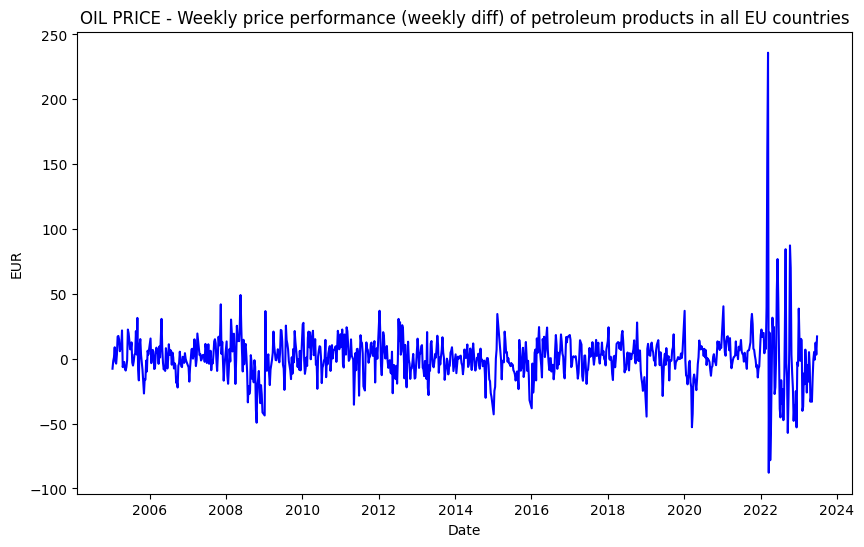

In [34]:
#Plot original OIL Price Timeseries

plt.figure(figsize=(10,6))
orig = plt.plot(dff, color='blue',label='Original')

plt.title("OIL PRICE - Weekly price performance (weekly diff) of petroleum products in all EU countries")
plt.xlabel('Date')
plt.ylabel('EUR')

plt.show()

In [35]:
dfp = data[['Date','Diesel']]
dfp = dfp.set_index(dfp.Date)
dfp.drop('Date', axis = 1, inplace = True)
print('Column datatypes= \n',dff.dtypes)
dfp.head()

Column datatypes= 
 Dperformance_1    float64
dtype: object


,Diesel
Date,
2005-01-03,909.06
2005-01-10,901.38
2005-01-17,899.68
2005-01-24,900.77
2005-01-31,909.60


In [36]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 916 entries, 2005-01-03 to 2023-06-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Diesel  916 non-null    float64
dtypes: float64(1)
memory usage: 14.3 KB


#### Quick additive **decomposition** of the Time Series

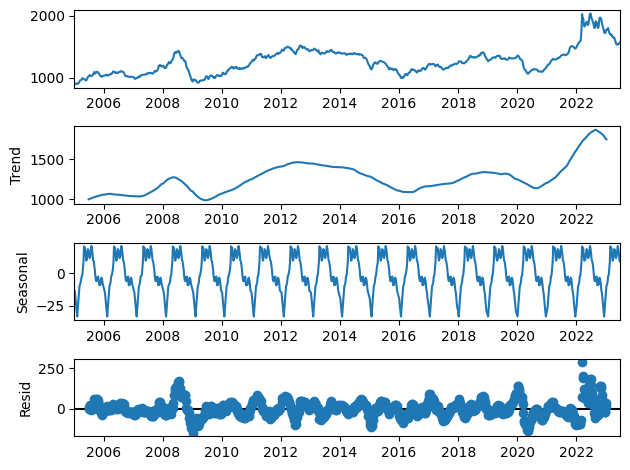

In [37]:
# We are going to use 'additive' model because it is quick to develop, fast to train, and provide interpretable patterns
# NOTE: period = 49 as in the time series of the european commission there are 49 weeks per year

decomposition = sm.tsa.seasonal_decompose(dfp, model='additive', period=49)
fig = decomposition.plot()

#### Quick **ARIMA Modelling** for Time Series Forecasting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



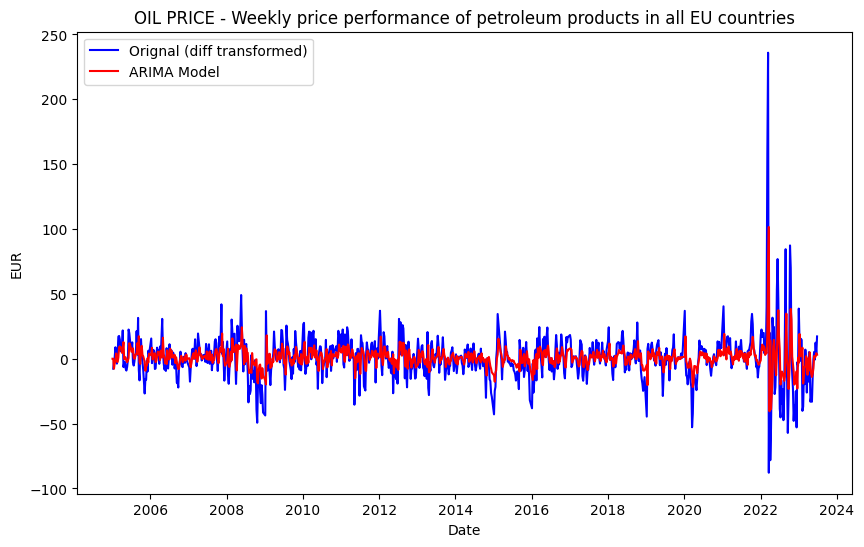

In [38]:
model = ARIMA(dff, order=(2, 1, 2))
results_ARIMA = model.fit()

plt.figure(figsize=(10,6))

plt.plot(dff,color= 'blue', label='Orignal (diff transformed)')
plt.plot(results_ARIMA.fittedvalues, color = 'red', label='ARIMA Model')

plt.title('The Combined ARIMA(p,d,q) Model')
plt.title('OIL PRICE - Weekly price performance of petroleum products in all EU countries')
plt.xlabel('Date')
plt.ylabel('EUR')

plt.legend()

In [39]:
# qualitative summary of the fitted model
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Dperformance_1   No. Observations:                  916
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3865.391
Date:                Fri, 21 Jul 2023   AIC                           7740.782
Time:                        15:34:50   BIC                           7764.877
Sample:                             0   HQIC                          7749.979
                                - 916                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5472      0.014    -39.512      0.000      -0.574      -0.520
ar.L2          0.4123      0.010     39.620      0.000       0.392       0.433
ma.L1         -0.0111      0.440     -0.025      0.980      -0.873       0.851
ma.L2         -0.9889      0.432     -2.287      0.022      -1.836      -0.141
sigma2       269.4872    116.898      2.305      0.021      40.370     498.604
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):             54633.57
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               3.86   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

---  
### Some **Rolling Window** Features  
How about calculating some statistical values based on past values? This method is called the rolling window method because the window would be different for every data point.  

We will select a window size, take the average of the values in the window, and use it as a feature.

In [40]:
# calcualting rolling mean for a window of 4 weeks
data['Drolling_mean4'] = data['Diesel'].rolling(window=4).mean()

dataX = data[['Date', 'Drolling_mean4', 'Diesel']]
dataX.head(10)

,Date,Drolling_mean4,Diesel
915,2005-01-03,NaN,909.06
914,2005-01-10,NaN,901.38
913,2005-01-17,NaN,899.68
912,2005-01-24,902.7225,900.77
911,2005-01-31,902.8575,909.60
910,2005-02-07,904.3300,907.27
909,2005-02-14,905.2825,903.49
908,2005-02-21,906.7625,906.69
907,2005-02-28,910.3100,923.79
906,2005-03-07,918.8275,941.34


In [41]:
import plotly.express as px
dataS= dataX[(dataX['Date'] > "2010-01-01") & (dataX['Date'] < "2019-12-31")]
df = dataS

# Create Line plot
fig = px.line(df, x=df['Date'], y=['Diesel', 'Drolling_mean4'])


# Setup Layout
fig.update_layout(
   title="OIL PRICE - Weekly prices of petroleum products in all EU countries<br><sup>EUROPEAN COMMISSION</sup><br><sup>with Rolling Means</sup>",
    legend_title="Data Points",
    yaxis_title='EUR',
    width=1000, height=600,
    yaxis_range = (800,2500))

# Display the plot
fig.show()

---  
### Some **Differencing** Time Series
Differencing is a method of transforming a time series dataset. Differencing is performed by subtracting the previous observation from the current observation.  

Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.

In [42]:
dataZ = data[['Date', 'Diesel']]
# 1 week difference
dataZ['Ddiff1'] = dataZ['Diesel'].diff(periods=1)
# 4 weeks (month) difference
dataZ['Ddiff4'] = dataZ['Diesel'].diff(periods=4)
# 12 weeks (quarter) difference
dataZ['Ddiff12'] = dataZ['Diesel'].diff(periods=12)

dataZ.head(13)

,Date,Diesel,Ddiff1,Ddiff4,Ddiff12
915,2005-01-03,909.06,NaN,NaN,NaN
914,2005-01-10,901.38,-7.68,NaN,NaN
913,2005-01-17,899.68,-1.70,NaN,NaN
912,2005-01-24,900.77,1.09,NaN,NaN
911,2005-01-31,909.60,8.83,0.54,NaN
910,2005-02-07,907.27,-2.33,5.89,NaN
909,2005-02-14,903.49,-3.78,3.81,NaN
908,2005-02-21,906.69,3.20,5.92,NaN
907,2005-02-28,923.79,17.10,14.19,NaN
906,2005-03-07,941.34,17.55,34.07,NaN


In [43]:
import plotly.express as px
dataS= dataZ[(dataZ['Date'] > "2019-01-01") & (dataZ['Date'] < "2022-12-31")]
df = dataS

# Create Line plot
fig = px.line(df, x=df['Date'], y=['Diesel', 'Ddiff1','Ddiff4','Ddiff12'])


# Setup Layout
fig.update_layout(
   title="OIL PRICE - Weekly prices of petroleum products in all EU countries<br><sup>EUROPEAN COMMISSION</sup><sup> - with differences 1/4/12 weeks</sup>",
    legend_title="Data Points",
    yaxis_title='EUR',
    width=1000, height=600,
    yaxis_range = (-500,600))

# Display the plot
fig.show()

---   
### Quick visualizing of Time Series data in **[Heatmap](https://www.analyticsvidhya.com/blog/2021/02/visualization-in-time-series-using-heatmaps-in-python/)** form


In [45]:
dataX = data[['Date','Diesel']]
dataS = dataX[(dataX['Date'] > "2018-01-01") & (dataX['Date'] < "2022-01-01")]
df = dataS
df.head()

,Date,Diesel
273,2018-01-08,1264.44
272,2018-01-15,1264.41
271,2018-01-22,1263.59
270,2018-01-29,1265.16
269,2018-02-05,1263.23


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 273 to 77
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    197 non-null    datetime64[ns]
 1   Diesel  197 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.6 KB


In [47]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 2018-01-08 to 2021-12-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Diesel  197 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


In [48]:
!pip install calplot

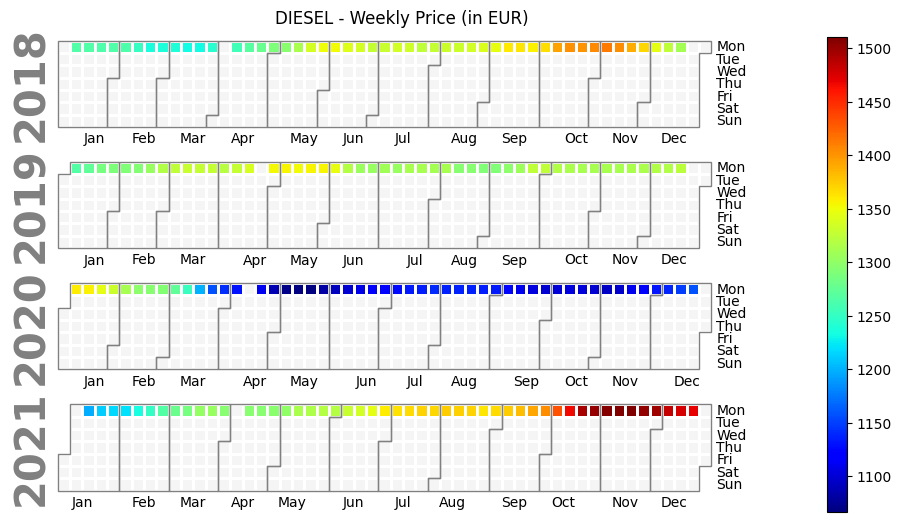

In [49]:
import calplot
fig1 = calplot.calplot(data = df['Diesel'],
                       cmap = 'jet',
                       figsize = (10, 5),
                       suptitle = "DIESEL - Weekly Price (in EUR)",
                       )

In [50]:
# export heatmap diagram (e.g. to default directory /sample_data)
import pylab
pylab.savefig('diesel-heatmap.png')

<Figure size 640x480 with 0 Axes>



---

